## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

### Building the Algorithm
For a most helpful post on hardcoding K-Nearest Neighbors, review this [article]('https://medium.com/deep-math-machine-learning-ai/chapter-5-k-nearest-neighbors-algorithm-with-code-from-scratch-7f93f653c860') or this [article]('https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/').

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
np.random.seed(6)
import math
from collections import Counter

In [2]:
(X,y) = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.95,random_state=50)

In [3]:
blobs = pd.DataFrame(X)
blobs['target'] = y
blobs.head()

,0,1,target
0,-2.608438,-8.026922,0
1,-0.862174,0.047874,1
2,-0.911824,-5.751732,0
3,-1.325581,-4.705618,0
4,1.226253,-7.715657,0


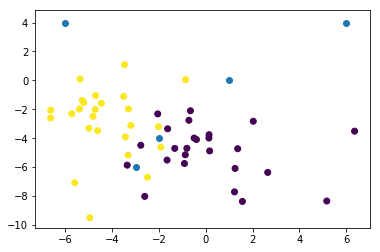

In [4]:
prediction_points=[[-2,-4],[-3,-6],[1,0],[6,4],[-6,4]]
prediction_points=np.array(prediction_points)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.scatter(prediction_points[:,0],prediction_points[:,1],marker='o')
plt.show()

In [5]:
def euclidean_distance(data, point, k):
    """This function returns measure of distance from the k-specified closest points in training data to prediction point."""
    euc_distance = np.sqrt(np.sum((data - point)**2, axis=1))
    return np.argsort(euc_distance)[0:k]

In [6]:
def predict(X, y, prediction_points,k):
    points_labels=[]

    for point in prediction_points:
        distances=euclidean_distance(X,point,k)
        
        results=[]
        for index in distances:
            results.append(y[index])
        
        label=Counter(results).most_common(1)
        points_labels.append([point,label[0][0]])
        
    return points_labels

In [7]:
results=predict(X, y, prediction_points,10)
for result in results:
    print("Point = ",result[0])
    print("Class = ",result[1])

Point =  [-2 -4]
Class =  0
Point =  [-3 -6]
Class =  0
Point =  [1 0]
Class =  0
Point =  [6 4]
Class =  0
Point =  [-6  4]
Class =  1


### Testing the Algorithm

In [8]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


In [9]:
# List of sample tests
test_samples = [[350,10], [125,15], [230,20], [125,50], [300,50]]

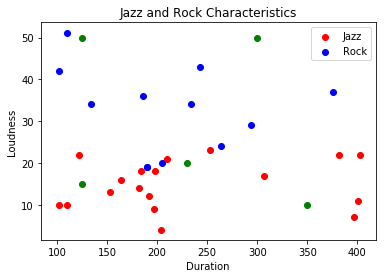

In [10]:
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.scatter(
    [item[0] for item in test_samples],
    [item[1] for item in test_samples],
    color='green'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [11]:
X = music[['loudness', 'duration']]
y = music.jazz

#Setting up algorithm
results=predict(X, y, test_samples,5)
for result in results:
    print("Point: ",result[0])
    print("Class: ",result[1])

Point:  [350, 10]
Class:  0
Point:  [125, 15]
Class:  1
Point:  [230, 20]
Class:  0
Point:  [125, 50]
Class:  0
Point:  [300, 50]
Class:  0


In [13]:
#Setting up sklearn preset
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X,y)

for sample in test_samples:
    print(neighbors.predict([sample]))

[0]
[1]
[0]
[0]
[0]


The manually coded algorithm provides the same results as the SkLearn preset KNeighbors Classifier. However, this does not seem like a very accurate classifier because **test_samples[0]** is surrounded by Jazz points, and yet both algorithms classify this point as a non-Jazz point.

### Alternative Method

In [14]:
import csv
import random
import math
import operator

In [15]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [16]:
# Testing the function
trainingSet=[]
testSet=[]
loadDataset('iris.data', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)))

Train: 103
Test: 47


In [17]:
# Creating the function
def euclideanDistance(instance1, instance2, length):
    '''
    This function calculates the euclidean distance between two instances.
    '''
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [18]:
# Testing the function
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print ('Distance: ' + repr(distance))

Distance: 3.4641016151377544


In [19]:
def getNeighbors(trainingSet, testInstance, k):
    """
    This function uses a training set to determine the nearest neighbor in a test set.
    """
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [20]:
# Testing
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b'], [5,5,5, 'b'],[10,10,10,'a'],[7,7,7,'a']]
testInstance = [5, 5, 5]
k = 3
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

[[5, 5, 5, 'b'], [4, 4, 4, 'b'], [7, 7, 7, 'a']]


In [21]:
def getResponse(neighbors):
    """
    This function calculates the majority voted response from a number of neighbors. 
    It assumes the class is the last attribute for each neighbor.
    """
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [22]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [23]:
def getAccuracy(testSet, predictions):
    """
    A function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.
    """
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [24]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [25]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

In [26]:
main()

Train set: 103
Test set: 47
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted=